# Mecánica clásica

Aunque el método de Euler y todos los otros métodos que veamos se pueden utilizar para cualquier sistema de ecuaciones diferenciales ordinarias, en la Física Computacional las ecuaciones más comunes a resolver son las **ecuaciones de movimiento** de Mecánica Clásica. En la Mecánica Clásica, describimos el movimiento de un objeto especificando su posición espacial a través de alguna **coordenada** (posición en $x,y$, ángulo $\theta$, etc.) **como función del tiempo** $t$.

Las coordenadas de nuestro objeto son **funciones** del tiempo. Las ecuaciones de movimiento son las ecuaciones diferenciales que obedecen dichas coordenadas de nuestro objeto. Existen diversas formas de obtener las ecuaciones de movimiento (las más importantes siendo la mecánica Newtoniana, Lagrangiana o Hamiltoniana) para un sistema de interés. 

Independientemente del método que utilizemos para obtener las ecuaciones, siempre (solo no se cumple en casos muy particulares) siempre llegamos a ecuaciones diferenciales de segundo orden para cada una de las coordenadas, que se pueden convertir en sistemas de dos ecuaciones de primer orden para cada coordenada. Para muchos sistemas interesantes, como el péndulo real, péndulo doble o un sistema de $n$ cuerpos, **es imposible encontrar una expresión analítica para las coordenadas**. Así, estamos forzados a utilizar métodos numéricos para estimar la solución.

Algunos ejemplos importantes de sistemas en mecánica son:

* **Péndulo real con resistencia del aire lineal**

Tenemos un objeto de masa $m$ pegado a una cuerda sin masa, de longitud constante $l$, sujeto a un campo gravitatorio con aceleración constante $g$ y que forma un ángulo $\theta(t)$ respecto al eje $y$ negativo, como se muestra en la siguiente figura


<img src="https://i.stack.imgur.com/q0X6bm.jpg" width = 300>
El ángulo $\theta(t)$ obedece la siguiente [ecuación de movimiento](https://en.wikipedia.org/wiki/Pendulum):

$$
\frac{d^2 \theta}{dt^2} = - \gamma \frac{d \theta}{dt} - \frac{g}{l} \sin{\theta}
$$

Con $\gamma>0$ una constante arbitraria.

* **Tiro parabólico con resistencia del aire lineal**

Tenemos un objeto de masa $m$ en dos dimensiones, descrito por sus coordenadas cartesianas $\mathbf{r}(t) = (x(t),y(t))$. El objeto tiene una velocidad inicial $\mathbf{v_0} = (v_{x0},v_{y0})$ con $v_{x0}>0$ y $v_{y0}>0$

<img src= "https://upload.wikimedia.org/wikipedia/commons/0/00/Ferde_hajitas3.svg" width=500>

La resistencia al aire se puede modelar de forma lineal como una fuerza proporcional a la velocidad:

$$
\mathbf{F}_{\text{aire}} = - b \mathbf{v} (t) = -b \frac{d\mathbf{r}}{dt}(t)
$$

con $b>0$ una constante positiva. Así, se obtienen las siguientes ecuaciones de movimiento para cada coordenada:

$$
\begin{align}
\frac{d^2 x}{dt^2} &=  - \frac{b}{m} \frac{dx}{dt} \\
\frac{d^2 y}{dt^2} &= - g - \frac{b}{m} \frac{dy}{dt} 
\end{align}
$$

* **Tiro parabólico con resistencia del aire cuadrática**

Si tenemos exactamente el mismo sistema pero ahora modelamos la resistencia del aire como 

$$
\begin{align}
\mathbf{F}_{\text{aire}} &= -c \Vert \mathbf{v} (t) \Vert^2 \hat{\mathbf{v}}(t) \\  
& \\
&= -c \sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dy}{dt} \right)^2 }  \frac{d\mathbf{r}}{dt}(t)
\end{align}
$$

Con $c>0$ una constante positiva. Obtenemos ahora las siguientes ecuaciones de movimiento para las coordenadas

$$
\begin{align}
\frac{d^2 x}{dt^2} &=  - \frac{c}{m} \sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dy}{dt} \right)^2 } \\
\frac{d^2 y}{dt^2} &= - g - \frac{c}{m} \sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dy}{dt} \right)^2 }
\end{align}
$$

### Ejercicio 1

Convierte las ecuaciones de movimiento del péndulo real, tiro parabólico con resistencia lineal y tiro parabólico con resistencia cuadrática en sistemas de ecuaciones de primer orden.

Nota que para cada coordenada debe haber dos variables (velocidad y posición) y un sistema de dos ecuaciones de primer orden, una para cada variable. Así, para el péndulo real debes obtener un sistema de dos ecuaciones de primer orden con dos variables y para los otros sistemas un sistema de cuatro ecuaciones de primer orden con cuatro variables.

## Preludio Computacional: animaciones

Aunque una coordenada normalmente se puede ver como una función $x(t):\mathbb{R} \to \mathbb{R}$, que ya sabemos cómo graficar, nos gustaría mejor hacer una **animación** que simplemente nos mostrara el valor de la función $x(t)$ en distintos tiempos $t$.

En la paquetería `Plots`, realizar una animación es muy sencillo, como veremos a continuación. Simplemente ponemos la gráfica que queremos que forme cada cuadro de la animación dentro de un ciclo For y antes ponemos la palabra `@animate`

In [2]:
using Plots

### Ejemplo:  graficando una trayectoria en un círculo

Queremos graficar la trayectoria $\mathbf{r}(t) = (x(t),y(t)) = (\cos{(2\pi t)},\sin{(2 \pi t)})$

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2020-4\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\LWw1t\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2020-4\\clases\\tmp.gif")
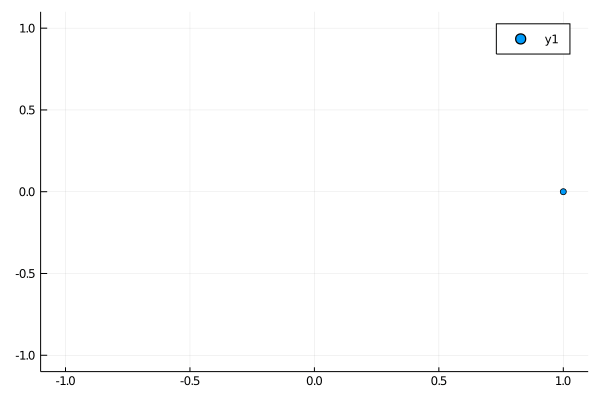

In [3]:
# tiempo final pensando que se inicia en t = 0
tf = 2.0
# numero de cuadros de la animación a generar
c = 100
tiempos = range(0,stop = tf, length = c)
# `@animate` crea un objeto de Plots en el que describimos una animación mediante cada cuadro
# guardamos dicho objeto en la variable `anim`
# dentro del ciclo for, debemos generar cada cuadro de la animación
anim = @animate for t in tiempos
    # grafica solamente el punto (cos(2*pi*t),sin(2*pi*t))
    scatter([cos(2*pi*t)],[sin(2*pi*t)])
    # fijamos los límites para que la gráfica se vea igual en cada cuadro
    xlims!(-1.1,1.1)
    ylims!(-1.1,1.1)
end
# convertimos los cuadros de la animación descrita en `anim` en un GIF
gif(anim)

Podemos camibiar los cuadros por segundo utilizando el argumento nombrado `fps`

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2020-4\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\LWw1t\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2020-4\\clases\\tmp.gif")
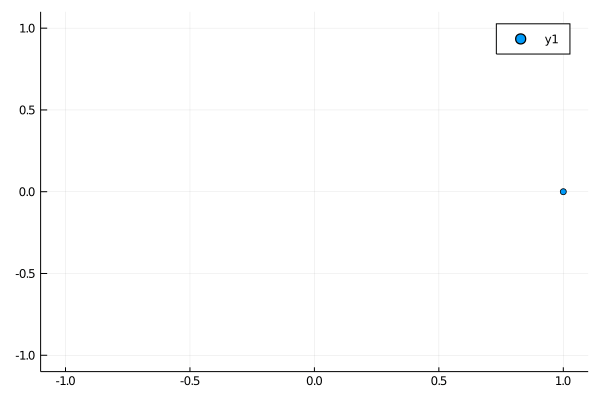

In [4]:
# 10 cuadros por segundo. Muy lento
gif(anim,fps=10)

Podemos guardar la animación poniendo un string con el nombre para guardar entre `anim` y `fps=10`

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2020-4\clases\prueba.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\LWw1t\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2020-4\\clases\\prueba.gif")
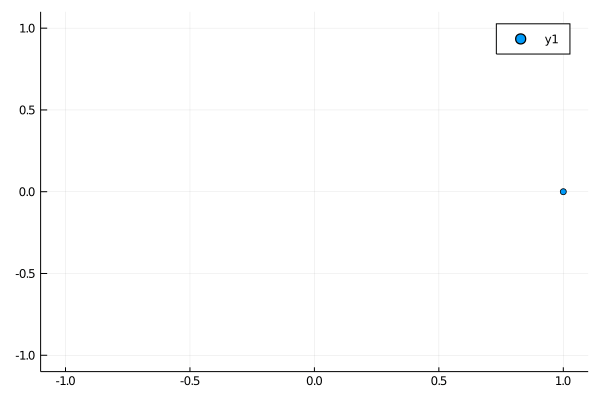

In [5]:
# 30 cuadros por segundo se ve muy bien
gif(anim,"prueba.gif",fps=30)

El gif se guardará en la misma ubicación donde está el Notebook.


Podemos utilizar esto también para graficar ondas o funciones que cambien con el tiempo.

In [6]:
function ondaViajera(x,t)
    return (sin(2*pi*(x-t)))/(2*pi*(x-t))
end

ondaViajera (generic function with 1 method)

In [7]:
tf = 3.0
c = 100
# defino el intervalo de valores de x en los que voy a graficar la función `ondaViajera`
# no hace falta definirlo dentro del ciclo pues no va a cambiar en cada cuadro
xs = range(-1,stop=3,length=200)
anim = @animate for t in range(0,stop = tf, length = c)
    # las ys están dadas por mi función `ondaViajera` y si cambian en cada cuadro
    # `t` está dado por el ciclo for. las `x` varían en el arreglo xs
    ys = [ondaViajera(x,t) for x in xs]
    plot(xs,ys)
    # `round(t,digits=2)` es una función que redondea la variable `t` para tener solo dos cifras decimales
    title!("Función animada. t = $(round(t,digits=2))")
    xlabel!("x")
    ylabel!("y")
    # fijamos los límites de la gráfica para que no cambien
    xlims!(-1,3)
    ylims!(-1,1)
end

Animation("C:\\Users\\sayeg\\AppData\\Local\\Temp\\jl_MTbL19", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2020-4\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\LWw1t\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2020-4\\clases\\tmp.gif")
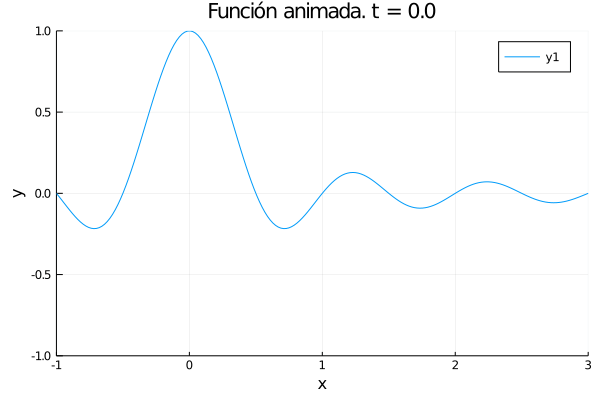

In [8]:
gif(anim,fps=30)

Podemos también iterar las posiciones que ya se encuentran en un arreglo en caso de que no podamos generar las nuestras en cada paso:

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2020-4\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\LWw1t\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2020-4\\clases\\tmp.gif")
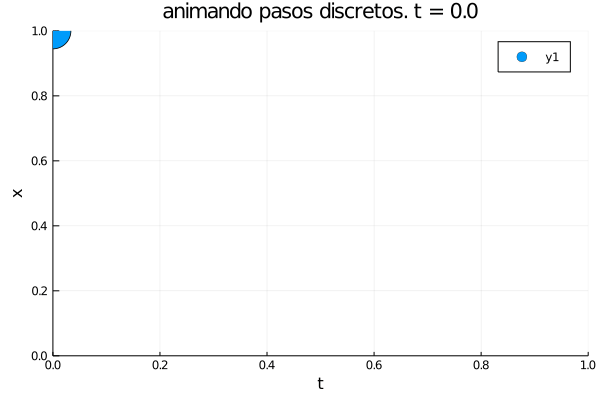

In [9]:
c = 100
tiempos = range(0,stop=1,length=c)
posiciones = [exp(-4t) for t in tiempos]
# iteramos sobre un índice `i` que nos permita acceder a los tiempos discretos 
# y a las posiciones discretas
anim = @animate for i in 1:c
    #  el argumento `markersize` nos permite aumentar el tamaño de los puntos
    scatter([tiempos[i]],[posiciones[i]],markersize=20)
    title!("animando pasos discretos. t = $(round(tiempos[i],digits=2))")
    xlabel!("t")
    ylabel!("x")
    xlims!(0,1)
    ylims!(0,1)
end
gif(anim,fps=30)

`@animate`, y cualquier otro comando que comienze con `@` es algo que en Julia se llama un **macro**. Un macro es una herramienta "mágica" que convierte código de Julia en otro código que hace algo ligeramente distinto. 

Podemos ahora resolver sistemas de mecánica clásica para obtener las coordenadas como función del tiempo y realizar una animación de la trayectoria de nuestros objetos

### Ejercicio 2

(i) Utiliza la función `eulerVec` de la clase pasada para resolver el sistema del péndulo real. Grafica $\theta(t)$, así como la velocidad $v_{\theta}(t)$. Realiza una animación de la trayectoria del péndulo. Usa condiciones iniciales y valores de paramétros arbitrarios (i.e escogidas por ustedes) pero que tengan **sentido físico** (i.e. que no sea $0$ la velocidad inicial y el ángulo inicial).

(ii) Fija $\gamma$ en un valor pequeño y resuélvelo para distintos valores de la longitud del péndulo $l$. ¿Cómo cambia el movimiento al cambiar la longitud?. Haz una animación donde compares distintas longitudes del péndulo con las mismas condiciones inciales.

(iii) Fija $l$ en un valor dado y resuélvelo para distintos valores de la resistencia $\gamma$. ¿Cómo cambia el movimiento al cambiar dicho parámetro?. Haz una animación donde compares distintos valores de $\gamma$ con las mismas condiciones iniciales.

(iv) A diferencia del péndulo simple, aquí no hacemos ninguna aproximación de ángulo pequeño. Así, resuelve el sistema tomando unas condiciones iniciales $\theta(0) > \pi/2$ y observa la trayectoria.

(v) recordando que la energía potencial $V$ y cinética $K$ para el sistema se escriben como:


$$
\begin{align}
K &=  \frac{1}{2} m\left(l\frac{d\theta}{dt}\right)^2 \\
V &= m g l \left(1-\cos{\theta}\right)
\end{align}
$$

Dale un valor arbitrario a $m$ y grafica la energía cinética y potencial como función del tiempo. Grafica también la energía mecánica total ($K+V$) . ¿La energía mecánica se conserva?

### Ejercicio 3

(i) Utiliza la función `eulerVec` de la clase pasada para resolver el sistema del tiro parabólico con resistencia del aire lineal. Grafica las componentes $x(t)$ y $y(t)$ como función del tiempo. Grafica también la trayectoria completa $(x(t),y(t))$. Realiza una animación de la trayectoria $(x(t),y(t))$. Usa condiciones iniciales arbitrarias que tengan **sentido físico** (i.e. que no sea $0$ la velocidad inicial en ambas componentes y que ambas coordenadas inicien en $0$).

(ii) Toma velocidades iniciales de la forma $(\cos{\alpha},\sin{\alpha})$ con $\alpha \in (0,\pi/2)$. Encuentra numéricamente a qué valor de $\alpha$ se logra el máximo **rango** (i.e. a que valor de $\alpha$ la trayectoria llega más lejos en el eje $x$).

**Sugerencia**. No tienen que hacer nada de minización o maximización, simplemente deben de resolver el sistema para distintos valores de $\alpha$, calculen el rango (a qué $x(t) \neq 0$ le corresponde cuando $y(t)=0$) y digan cuál lo maximiza.

(iii) Fija la masa y la condicion inicial y resuelvelo para distintos valores de la constante $b$. ¿Cómo cambia la trayectoria?

(iv) recordando que la energía potencial $V$ y cinética $K$ para el sistema se escriben como:

$$
\begin{align}
K &=  \frac{1}{2} m\left(\frac{dx}{dt}^2 + \frac{dy}{dt}^2 \right) \\
V &= m g y 
\end{align}
$$

Dale un valor arbitrario a $m$ y grafica la energía cinética y potencial como función del tiempo. Grafica también la energía mecánica total. ¿La energía mecánica se conserva?

### Ejercicio 4

Realiza todo el ejercicio 3 pero ahora para el tiro parabólico con resistencia del aire cuadrática

## Los límites del método de Euler

El método de Euler puede fracasar de manera muy grave. Consideremos el sistema de un péndulo simple (sin resistencia del aire), en el que tomamos la aproximación de angulo pequeño $\sin{\theta} \approx \theta$. En ese caso, la ecuación diferencial es

$$
\frac{d^2 \theta}{dt^2} + \frac{g}{l} \theta = 0
$$

Que si definimos $v_{\theta} = \frac{d\theta}{dt}$ , la convertimos en el siguiente sistema de ecuaciones diferenciales

$$
\begin{align}
\dot{\theta} &= v_{\theta} \\
\dot{v_{\theta}} &= - \frac{g}{l} \theta \\
\end{align}
$$

Esta ecuación es equivalente a un oscilador armónico simple

In [13]:
function eulerVec(f,x_0,t_0,t_f,h)
    tiempos = range(t_0,stop = t_f, step = h)
    # `dim` es el tamaño del sistema de ecuaciones, que es igual a la longitud de la condicion inicial
    dim = length(x_0)
    n = length(tiempos)
    # `xs` es una matriz donde ire guardando mis vectores x en cada pasp del tiempo como renglones
    xs = zeros(n,dim)
    # añadimos la condición inicial como el primer renglon
    xs[1,:] = x_0
    for i in 2:n
        # calculamos el siguiente término
        xs[i,:] = xs[i-1,:] + h*f(xs[i-1,:],tiempos[i-1])
    end
    return (tiempos,xs)
end

eulerVec (generic function with 1 method)

In [14]:
function penduloSimpleEuler(l,x_0,t_0,t_f,h)
    # definir la función `f` que describe el sistema de ecuaciones
    function penduloSimple(Theta,t)
        # Theta es un vector cuya primera entrada es el ángulo theta y la segunda es la velocidad en theta
        # La funcion regresa la derivada de theta y de la derivada de la velocidad
        return [Theta[2],-(9.8/l)*sin(Theta[1])]
    end
    # calcular la solución utilizando `eulerVec`
    return eulerVec(penduloSimple,x_0,t_0,t_f,h)
end

penduloSimpleEuler (generic function with 1 method)

In [15]:
l = 10
# condicion incial theta = pi/8 = 22.5 grados, velocidad en theta = 0
x_0 = [pi/8,0.0]
t_0 = 0
t_f = 30
h = 1e-1
tiempos, xs = penduloSimpleEuler(l,x_0,t_0,t_f,h)

(0.0:0.1:30.0, [0.39269908169872414 0.0; 0.39269908169872414 -0.0375029763717788; … ; -1.4925866459419435 -0.36573581769694385; -1.5291602277116378 -0.26803538590625037])

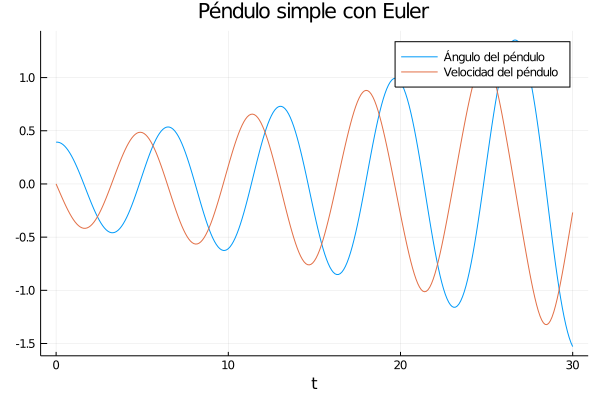

In [16]:
plot(tiempos,xs[:,1], label ="Ángulo del péndulo")
plot!(tiempos,xs[:,2], label ="Velocidad del péndulo")
title!("Péndulo simple con Euler")
xlabel!("t")

La solución obtenida crece en amplitud, lo que claramente debe de estar mal

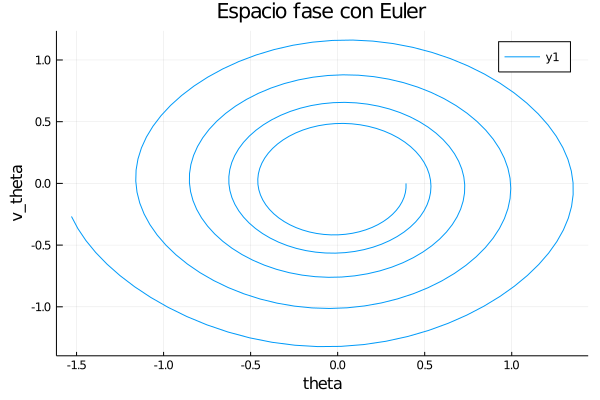

In [17]:
plot(xs[:,1],xs[:,2])
title!("Espacio fase con Euler")
xlabel!("theta")
ylabel!("v_theta")

In [18]:
n = length(tiempos)
anim = @animate for i in 1:n
    # graficamos la masa del pendulo
    scatter([-l*sin(xs[i,1])],[-l*cos(xs[i,1])],markersize=20)
    # graficamos la cuerda como una linea entre el origen y la masa
    plot!([0,-l*sin(xs[i,1])],[0,-l*cos(xs[i,1])])
    xlims!(-l,l)
    ylims!(-l*1.2,0)
    title!("Pendulo simple con Euler \n t = $(round(tiempos[i],digits=2))")
end

Animation("C:\\Users\\sayeg\\AppData\\Local\\Temp\\jl_f9qJJA", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png", "000301.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2020-4\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\LWw1t\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2020-4\\clases\\tmp.gif")
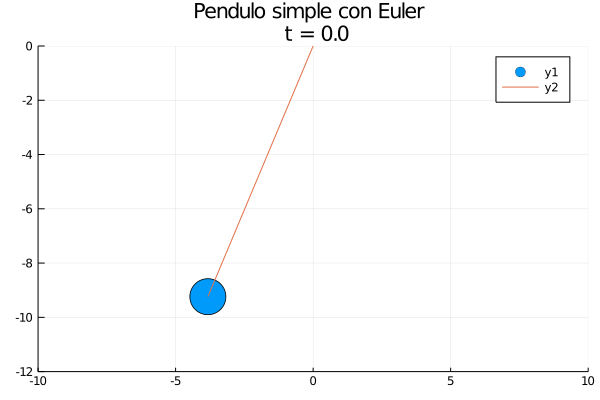

In [19]:
gif(anim,fps=30)

Es claro que el método no funciona de manera correcta. Observamos que la amplitud del péndulo aumenta. Podemos observar que sucede al ver la energía del péndulo.

Esto se vuelve todavía más drástico al analizar la energía del sistema

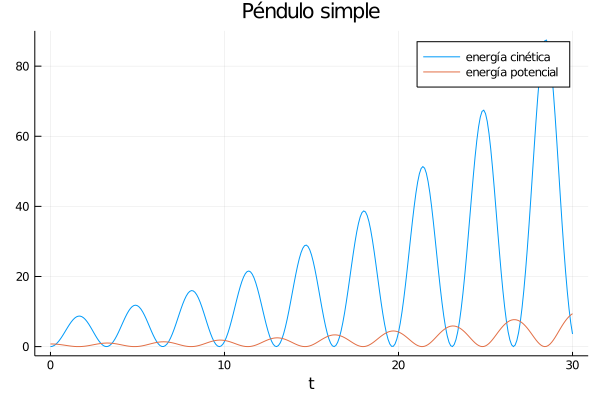

In [20]:
m = 1
cinetica = [m*(l*vtheta)^2/2 for vtheta in xs[:,2]]
potencial = [m*9.8*(1-cos(theta)) for theta in xs[:,1]]
plot(tiempos,cinetica,label="energía cinética")
plot!(tiempos,potencial,label="energía potencial")
title!("Péndulo simple")
xlabel!("t")

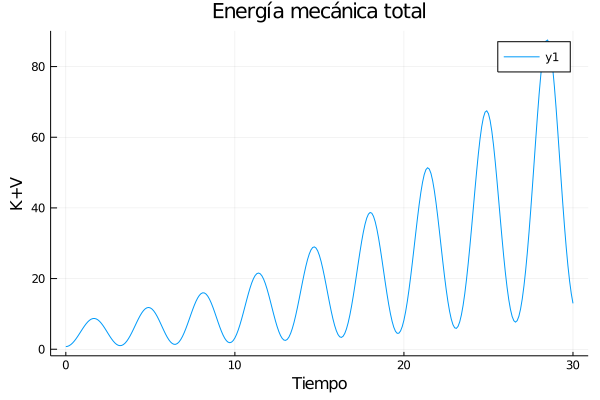

In [22]:
mecanica = potencial + cinetica
plot(tiempos,mecanica)
title!("Energía mecánica total")
xlabel!("Tiempo")
ylabel!("K+V")

Pareciera que la energía mecánica no se conserva, lo que sabemos sí debería de pasar!

Queda claro que la solución obtenida por el método de Euler para el péndulo simple tiene un error demasiado grande. Por lo tanto debemos utilizar **otros métodos** que nos permitan resolver el sistema

## Otros métodos simples para EDOs

### Método de Euler-Cromer

La primera modificación sencilla que podemos realizar para el caso de un solo sistema de dos ecuaciones diferenciales de la siguiente forma:

$$
\begin{align}
\dot{x} &= v(t) \\
\dot{v} &= f(x,t)
\end{align}
$$

El método consiste en actualizar **primero la velocidad** utilizando el Método de Euler:

$$
v_{i} = v_{i-1} + h f(x_{i-1},t_{i-1})
$$

Y utilizar la nueva velocidad para actualizar después la posición, también con un paso de Euler

$$
x_{i} = x_{i-1} + h v_{i}
$$

A este método se le conoce como el [**método de Euler-Cromer**](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method)

### Ejercicio 6

Implementa una función `eulerCromer(f,x_0,v_0,t_0,t_f,h)` que resuelva la ecuación diferencial dada por el sistema

$$
\begin{align}
\dot{x} &= v(t) \\
\dot{v} &= f(x,t)
\end{align}
$$

Con condiciones iniciales $x(t_0) = x_0$, $v(t_0) = v_0$, $t_f$ el tiempo final y $h$ el tamaño de paso. Recuerda, **solo para este métdodo**, que `f` debe ser una función escalar de dos variables y `x_0`, `v_0` escalares

Tu función debe de regresar los tres arreglos correspondientes a los tiempos, las posiciones y las velocidades.


### Ejercicio 7

(i) Utiliza tu función `eulerCromer` para resolver el péndulo simple y compara tus resultados con el método de Euler normal. ¿Mejora la solución?

(ii) Resuelve también el oscilador armónico simple descrito por la ecuación de segundo orden:

$$
\frac{d^2 x}{dt^2} = -k x
$$

Escoje condiciones iniciales arbitrarias **que tengan sentido físico** (i.e. no hacer 0 simultáneamente la velocidad y la posición incial). Haz una animación de la trayectoria, grafica el espacio fase y la energía como función del tiempo.

### Método del punto medio


Una desventaje del método de Euler-Cromer es que solo se puede utilizar para sistemas de ecuaciones con una forma específica (que es suficiente para nosotros pues dicha forma encaja con la mayoría de las ecuaciones de movimiento). Es posible extenderlo para resolver sistemas de ecuaciones más grandes, actualizando primero todas las velocidades y luego usando esos valores para todas las posciones.

De cualquier manera, nos gustaría tener otros métodos mejores que el de Euler para un sistema de ecuaciones diferenciales arbitrario. Recordando la forma general de un sistema de ecuaciones diferenciales:

$$
\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t),t)
$$

que mediante el método de Euler se discretiza en el siguiente esquema:

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t),t)
$$

Una mejora, derivada de la regla de integración rectangular centrada, consiste en no evaluar $\mathbf{f}$ en $(\mathbf{x}(t),t)$, si no en $(\mathbf{x}(t+h/2),t+h/2)$, con lo que la regla se vería

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t+h/2),t+h/2)
$$

Sin embargo, un problema es que **no conocemos** $\mathbf{x}(t+h/2)$. Sin embargo, podemos aproximarlo utilizando un paso de Euler:

$$
\mathbf{x}(t+h/2) = \mathbf{x}(t) + \frac{h}{2} \;\mathbf{f}(\mathbf{x}(t),t)
$$

Usando dicha aproximación, podemos reescribir la regla del psao como

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t) + \frac{h}{2} \;\mathbf{f}(\mathbf{x}(t),t),t+h/2)
$$

Utilizando índices para notar la dependencia temporal, queda de la forma

$$
\mathbf{x}_i = \mathbf{x}_{i-1} + h \;\mathbf{f}(\mathbf{x}_{i-1} + \frac{h}{2} \;\mathbf{f}(\mathbf{x}_{i-1},t_{i-1}),t_{i-1}+h/2)
$$

Para simplificar la notación, podemos mejor definir una variable auxiliar $\mathbf{k}_1$ para representar a $\mathbf{x}(t+h/2)$:

$$
\mathbf{k}_1 = \mathbf{x}_{i-1} + \frac{h}{2} \;\mathbf{f}(\mathbf{x}_{i-1},t_{i-1})
$$

Y así escribimos el método como

$$
\mathbf{k}_1 = \mathbf{x}_{i-1} + \frac{h}{2} \;\mathbf{f}(\mathbf{x}_{i-1},t_{i-1}) \\
\mathbf{x}_i = \mathbf{x}_{i-1} + h \;\mathbf{f}(\mathbf{k}_1,t_{i-1}+h/2)
$$

A este método se le conoce como [**método (explícito) del punto medio**](https://en.wikipedia.org/wiki/Midpoint_method)

### Ejercicio 8

Implementa una función `puntoMedioVec(f,x_0,t_0,t_f,h)` con `f` la función **vectorial** tal que $\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t),t)$, `x_0` (un vector de $n$ entradas) y `t_0` la condición inicial, `t_f` el tiempo máximo al que queremos obtener la solución y `h` el tamaño de paso. La función debe de implementar el método del punto medio y debe de regresar el arreglo de los tiempos `[t_0,t_1, t_2,....,t_n]` con $t_{n}< t_f < t_{n} + h$ y el de la solución a la ecuación diferencial `[x_0,x_1,...,x_n]`.

**Sugerencia 1:** utiliza una tupla para regresar ambos valores.

**Sugerencia 2** puedes utilizar `zeros(n,l)` para prealocar una matriz de zeros de $n \times l$ en la cual puedes guardar como renglones cada vector $\mathbf{x}_i$

### Ejercicio 9

Repite el ejercicio 7 utilizando ahora tu función `puntoMedioVec`. ¿Mejora respecto al método de Euler-Cromer?

### Método de Heun

Siguiendo la misma de idea del método del punto medio, podemos ahora utilizar la regla de integración trapezoidal sobre la función $\mathbf{f}$ para obtener la siguiente aproximación:

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + \frac{1}{2} \left( \mathbf{f}(\mathbf{x}(t),t) + \mathbf{f}(\mathbf{x}(t+h),t+h) \right) 
$$

Nuevamente, al no conocer $\mathbf{x}(t+h)$, no podemos evaluar el lado derecho de la expresión. Lo mejor que podemos hacer es utilizar un paso de euler para aproximarlo en el lado derecho de la ecuación y así obtener la siguiente expresión


$$
\mathbf{x}(t+h) = \mathbf{x}(t) + \frac{1}{2} \left( \mathbf{f}(\mathbf{x}(t),t) + \mathbf{f}(\mathbf{x}(t)+h \;\mathbf{f}(\mathbf{x}(t),t),t+h) \right) 
$$

Nuevamente, para simplificar la notación, definimos una variable auxiliar $\mathbf{k}_1$ como

$$
\mathbf{k}_1 = \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t),t) 
$$

Y así nuestro método se puede reescribir como

$$
\begin{align}
\mathbf{k}_1 &= \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t),t) \\
\mathbf{x}(t+h) &= \mathbf{x}(t) + \frac{h}{2} \left( \mathbf{f}(\mathbf{x}(t),t) + \mathbf{f}(\mathbf{k}_1 ,t+h) \right)
\end{align}
$$

Usando índices para la dependencia temportal, tenemos

$$
\begin{align}
\mathbf{k}_1 &= \mathbf{x}_{i-1} + h \;\mathbf{f}(\mathbf{x}_{i-1},t_{i-1}) \\
\mathbf{x}_i &= \mathbf{x}_{i-1} + \frac{h}{2} \left( \mathbf{f}(\mathbf{x}_{i-1},t_{i-1}) + \mathbf{f}(\mathbf{k}_1 ,t_{i}) \right)
\end{align}
$$

A este método se le conoce como [**método de Heun**](https://en.wikipedia.org/wiki/Heun%27s_method)

### Ejercicio 10

Implementa una función `heun(f,x_0,t_0,t_f,h)` con `f` la función **vectorial** tal que $\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t),t)$, `x_0` (un vector de $n$ entradas) y `t_0` la condición inicial, `t_f` el tiempo máximo al que queremos obtener la solución y `h` el tamaño de paso. La función debe de implementar el método de heun y debe de regresar el arreglo de los tiempos `[t_0,t_1, t_2,....,t_n]` con $t_{n}< t_f < t_{n} + h$ y el de la solución a la ecuación diferencial `[x_0,x_1,...,x_n]`.

**Sugerencia 1:** utiliza una tupla para regresar ambos valores.

**Sugerencia 2** puedes utilizar `zeros(n,l)` para prealocar una matriz de zeros de $n \times l$ en la cual puedes guardar como renglones cada vector $\mathbf{x}_i$

### Ejercicio 11

Repite el ejercicio 7 ahora utilizando tu función `Heun` y compara con los métodos de Euler'Cromer y el de punto medio.